In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pint
import matplotlib.colors as mcolors

u = pint.UnitRegistry()

In [16]:
plt.style.available
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
# Source plane
dxs = 8e-6
dys = 8e-6

Lxs = 8e-3
Lys = 8e-3

# Reciever plane
dxr = 8e-6
dyr = 8e-6

Lxr = 8e-3
Lyr = 8e-3

# Others
wavelength = 520e-9

z = 200e-3

In [ ]:
Nh = (Lxs * Lys) * (Lxr * Lyr) / (wavelength**2 * z**2)

In [ ]:
print(Nh)

## Z sweep

In [ ]:
z = np.linspace(1e-3, 100, 1000)
Nh = Nh = (Lxs * Lys) * (Lxr * Lyr) / (wavelength**2 * z**2)

In [ ]:
print(np.min(Nh))

In [ ]:
plt.plot(z, Nh)
plt.hlines(xmin=z[0], xmax=z[-1], y = 1)
plt.yscale('log')

## Andy dataset

In [44]:
Ls = 2040e-9
Lr = 2040e-9
As = Ls**2
Ar = Lr**2
wavelength = 1550e-9
d = np.linspace(1e-9, 10*wavelength, 1000)

In [45]:
Nh = (As * Ar) / (wavelength**2 * d**2)

In [46]:
dh1 = d[np.where(Nh > 1)[0][-1]]
nh_wave_by_2 = Nh[np.where(d < wavelength/2)[0][-1]]

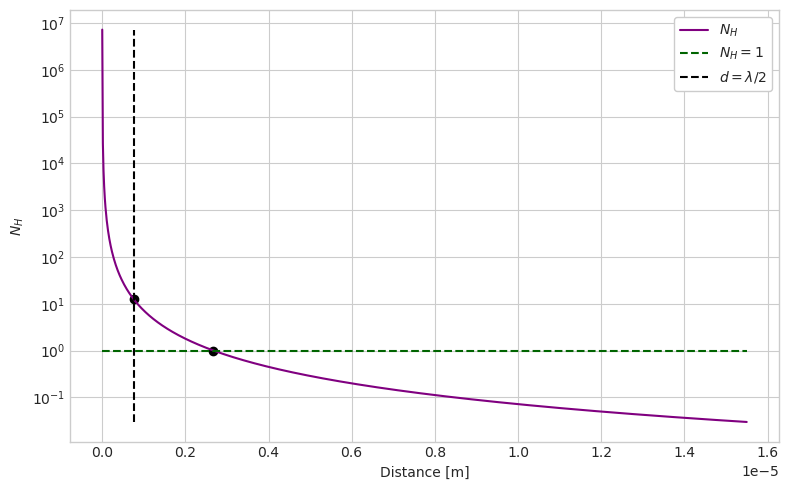

In [47]:
fig,ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(d, Nh, label=r'$N_H$', color='purple')
ax.hlines(xmin=d[0], xmax=d[-1], y=1, label=r'$N_H = 1$', color='darkgreen', linestyle='dashed')
ax.vlines(ymin=np.min(Nh), ymax=np.max(Nh), x=wavelength/2, label=r'$d = \lambda / 2$', color='black', linestyle='dashed')
ax.scatter(dh1, 1, color='black')
ax.scatter(wavelength/2, nh_wave_by_2, color='black')
ax.set_yscale('log')
ax.set_ylabel(r"$N_H$")
ax.set_xlabel("Distance [m]")
ax.legend(frameon=True, framealpha=1)
plt.tight_layout()
fig.savefig("andy_dataset_NH.png", dpi=300)

## Bigger problem

In [56]:
As = 7.2
Ar = 0.008
wavelength = 1550e-9
distance = np.linspace(1, 2000, 10000)

In [57]:
Nh = (As * Ar) / (wavelength**2 * distance**2)

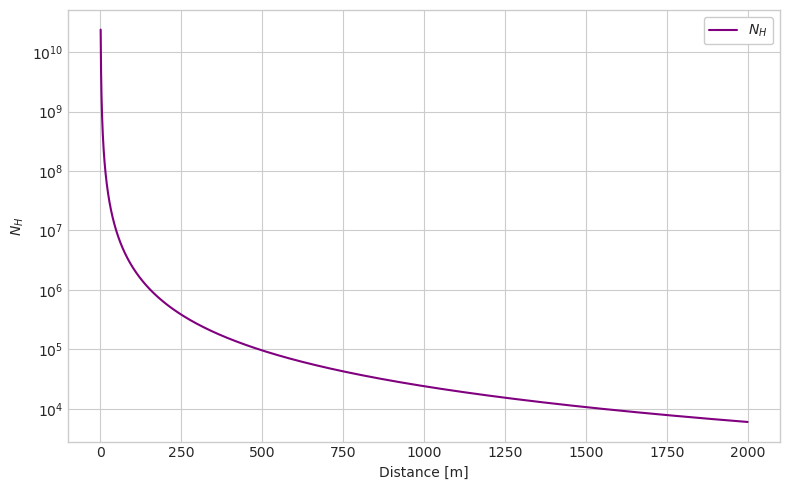

In [59]:
fig,ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(distance, Nh, label=r'$N_H$', color='purple')
ax.set_yscale('log')
ax.set_ylabel(r"$N_H$")
ax.set_xlabel("Distance [m]")
ax.legend(frameon=True, framealpha=1)
plt.tight_layout()
fig.savefig('bigger_problem_nh.png', dpi=300)

In [60]:
Nh[-1]

np.float64(5993.75650364204)

## Smallest patch size

In [63]:
Nh = 1
Ar = 0.008

In [64]:
As = (Nh * wavelength**2 * distance**2) / Ar

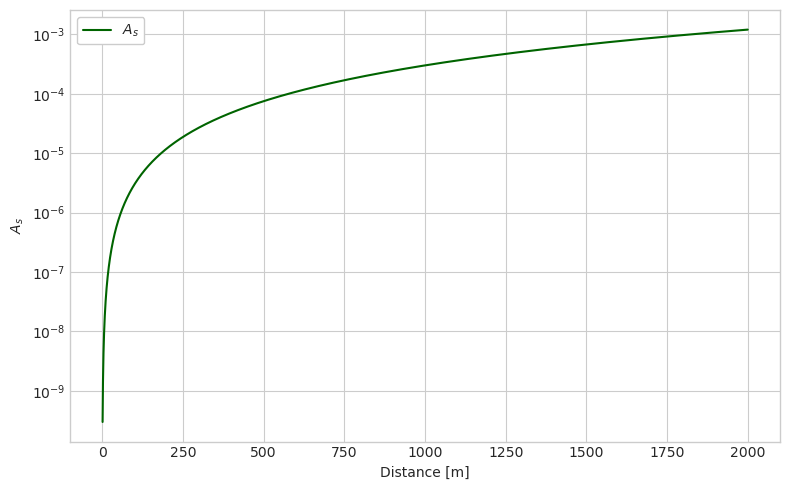

In [65]:
fig,ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(distance, As, label=r'$A_s$', color='darkgreen')
ax.set_yscale('log')
ax.set_ylabel(r"$A_s$")
ax.set_xlabel("Distance [m]")
ax.legend(frameon=True, framealpha=1)
plt.tight_layout()
fig.savefig('bigger_problem_as.png', dpi=300)

In [66]:
print(As[-1])

0.0012012499999999998


## Smallest patch size by wavelength

In [69]:
Nh = 1
Ar = 0.008
wavelengths = [1e-6, 1.5e-6, 2e-6, 2.5e-6, 3e-6, 3.5e-6, 4e-6, 4.5e-6, 5e-6, 5.5e-6, 6e-6]
As_list = []
for wl in wavelengths:
    As_list.append((Nh * wl**2 * distance**2) / Ar)

In [72]:
cmap = plt.get_cmap('viridis')
color_delta = 1 / len(wavelengths)

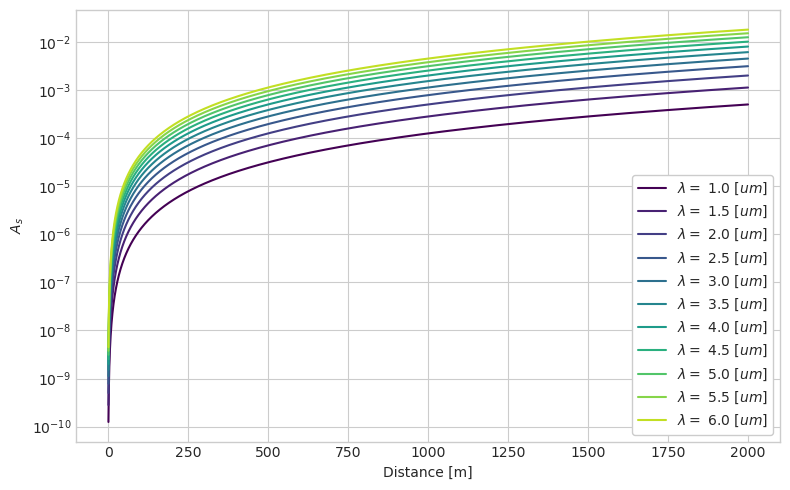

In [79]:
fig,ax = plt.subplots(1,1,figsize=(8,5))

for i, wl in enumerate(wavelengths):
    ax.plot(distance, As_list[i], label=r'$\lambda =$ {} $[um]$'.format(wl*1e6), color=cmap(color_delta*i))
    
ax.set_yscale('log')
ax.set_ylabel(r"$A_s$")
ax.set_xlabel("Distance [m]")
ax.legend(frameon=True, framealpha=1)
plt.tight_layout()
fig.savefig("bigger_problem_as_wl.png", dpi=300)